In [115]:
%pylab inline
from pygadgetreader import *
from octopus import density, orbit_cm
import yt

Populating the interactive namespace from numpy and matplotlib


In [116]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [126]:
all_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
all_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
all_pid_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

all_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
all_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
all_pid_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [127]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], xyz[index_lmc], vxyz[index_lmc]

In [128]:
def norm_vector(pos, vel):
    r_i_norm = np.zeros((len(pos),3))
    for i in range(len(pos)):
        r_i_norm[i] = pos[i] / (sum(pos[i][j] for j in range(len(pos[i]))))
    return r_i_norm

def normalize(pos, vel):
    norm_pos = norm_vector(pos, vel)
    v_r = np.zeros(len(pos))
    for i in range(len(pos)):
        v_r[i] = dot(vel[i], norm_pos[i])
    return v_r

In [129]:
# selecting MW and LMC particles
mw_pos_i, mw_vel_i, lmc_pos_i, lmc_vel_i = mw_particles(all_pos_i, all_vel_i, all_pid_i, 1000000) 
mw_pos_f, mw_vel_f, lmc_pos_f, lmc_vel_f = mw_particles(all_pos_f, all_vel_f, all_pid_f, 1000000) 

In [142]:
# Removing particiles at infty
xmw_cm, ymw_cm, zmw_cm, vxmw_cm, vymw_cm, vzmw_cm = orbit_cm.CM(mw_pos_f, mw_vel_f)
xlmc_cm, ylmc_cm, zlmc_cm, vxlmc_cm, vylmc_cm, vzlmc_cm = orbit_cm.CM(lmc_pos_f, lmc_vel_f)
xlmc_cmi, ylmc_cmi, zlmc_cmi, vxlmc_cmi, vylmc_cmi, vzlmc_cmi = orbit_cm.CM(lmc_pos_i, lmc_vel_i)

print xmw_cm, ymw_cm, zmw_cm
print xlmc_cmi, ylmc_cmi, zlmc_cmi
print xlmc_cm, ylmc_cm, zlmc_cm


mw_clean_i = np.where(np.sqrt(mw_pos_i[:,0]**2.0 + mw_pos_i[:,1]**2.0 + mw_pos_i[:,2]**2.0)<500)[0]
mw_clean_f = np.where(np.sqrt((mw_pos_f[:,0]-xmw_cm)**2.0 + (mw_pos_f[:,1]-ymw_cm)**2.0 + (mw_pos_f[:,2]-zmw_cm)**2.0)<500)[0]

lmc_clean_i = np.where(np.sqrt((lmc_pos_i[:,0]-xlmc_cmi)**2.0 + (lmc_pos_i[:,1]-ylmc_cmi)**2.0 + (lmc_pos_i[:,2]-zlmc_cmi)**2.0)<500)[0]
lmc_clean_f = np.where(np.sqrt((lmc_pos_f[:,0]-xlmc_cm)**2.0 + (lmc_pos_f[:,1]-ylmc_cm)**2.0 + (lmc_pos_f[:,2]-zlmc_cm)**2.0)<500)[0]



mw_pos_i = mw_pos_i[mw_clean_i]
mw_vel_i = mw_vel_i[mw_clean_i]
mw_pos_f = mw_pos_f[mw_clean_f]
mw_vel_f = mw_vel_f[mw_clean_f]



lmc_pos_i = lmc_pos_i[lmc_clean_i]
lmc_vel_i = lmc_vel_i[lmc_clean_i]
lmc_pos_f = lmc_pos_f[lmc_clean_f]
lmc_vel_f = lmc_vel_f[lmc_clean_f]

vr_mw_i = normalize(mw_pos_i, mw_vel_i)
vr_mw_f = normalize(mw_pos_f, mw_vel_f)

vr_lmc_i = normalize(lmc_pos_i, lmc_vel_i)
vr_lmc_f = normalize(lmc_pos_f, lmc_vel_f)

r_mw_i = np.sqrt(mw_pos_i[:,0]**2.0 + mw_pos_i[:,1]**2.0 + mw_pos_i[:,2]**2.0)
r_mw_f = np.sqrt(mw_pos_f[:,0]**2.0 + mw_pos_f[:,1]**2.0 + mw_pos_f[:,2]**2.0)

r_lmc_i = np.sqrt(lmc_pos_i[:,0]**2.0 + lmc_pos_i[:,1]**2.0 + lmc_pos_i[:,2]**2.0)
r_lmc_f = np.sqrt(lmc_pos_f[:,0]**2.0 + lmc_pos_f[:,1]**2.0 + lmc_pos_f[:,2]**2.0)

3.10811561905 33.134830385 -10.4964836395
11.5914384968 247.819683453 129.865672829
1.95012230877 -11.9249191456 -37.8639679987


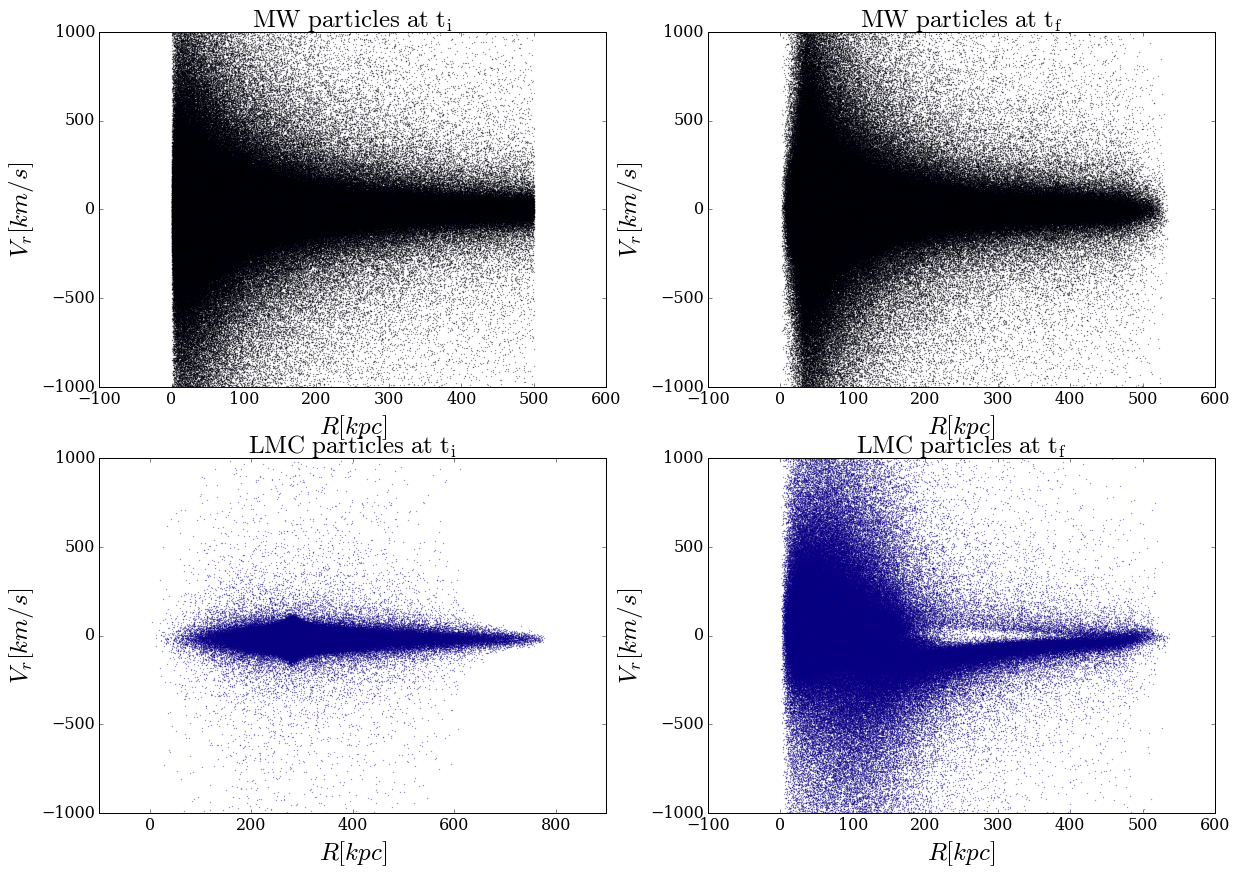

In [147]:
figure(figsize=(20, 14))
subplot(2, 2, 1)
title('$\mathrm{MW\ particles\ at\ t_i}$', fontsize=25)
scatter(r_mw_i, vr_mw_i, s=0.1, alpha=0.6)
ylim(-1000, 1000)
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)


subplot(2, 2, 2)
title('$\mathrm{MW\ particles\ at\ t_f}$', fontsize=25)
scatter(r_mw_f, vr_mw_f, s=0.1, alpha=0.6)
ylim(-1000, 1000)
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)


subplot(2, 2, 3)
title('$\mathrm{LMC\ particles\ at\ t_i}$', fontsize=25)
scatter(r_lmc_i, vr_lmc_i, s=0.1, c='r', edgecolors='darkblue', alpha=0.6)
ylim(-1000, 1000)
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)

subplot(2, 2, 4)
title('$\mathrm{LMC\ particles\ at\ t_f}$', fontsize=25)
scatter(r_lmc_f, vr_lmc_f, s=0.1, c='r', edgecolors='darkblue', alpha=0.6)
ylim(-1000, 1000)
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)


In [46]:
bbox = [[-89000, 89000],
        [-89000, 89000],
        [-89000, 89000]]
 

ds1 = yt.load('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', bounding_box=bbox)
ds1.index
ad1= ds1.all_data()

ds2 = yt.load('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', bounding_box=bbox)
ds2.index
ad2= ds2.all_data()




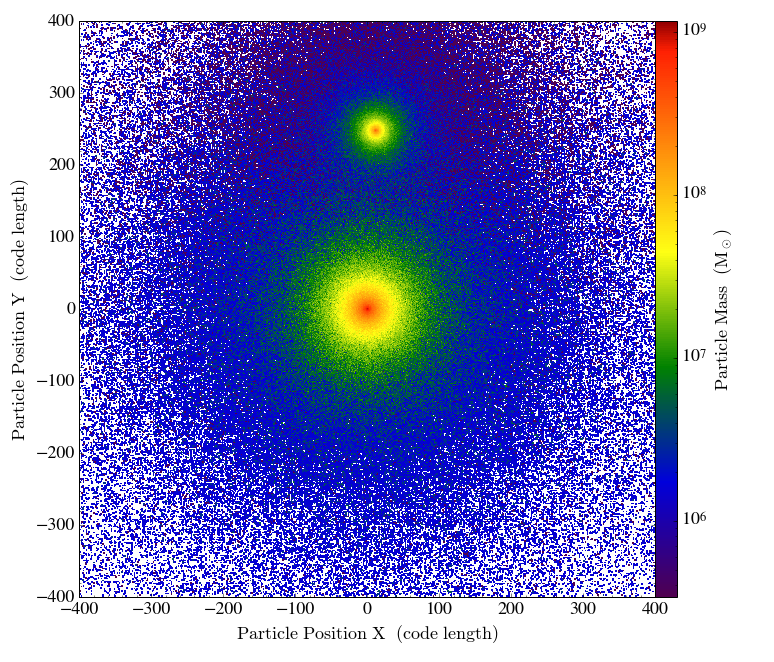

In [53]:
p = yt.ParticlePlot(ds1, ('PartType1','particle_position_x'), ('PartType1','particle_position_y'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
p.set_xlim(-400, 400)
p.set_ylim(-400, 400)
p.show()


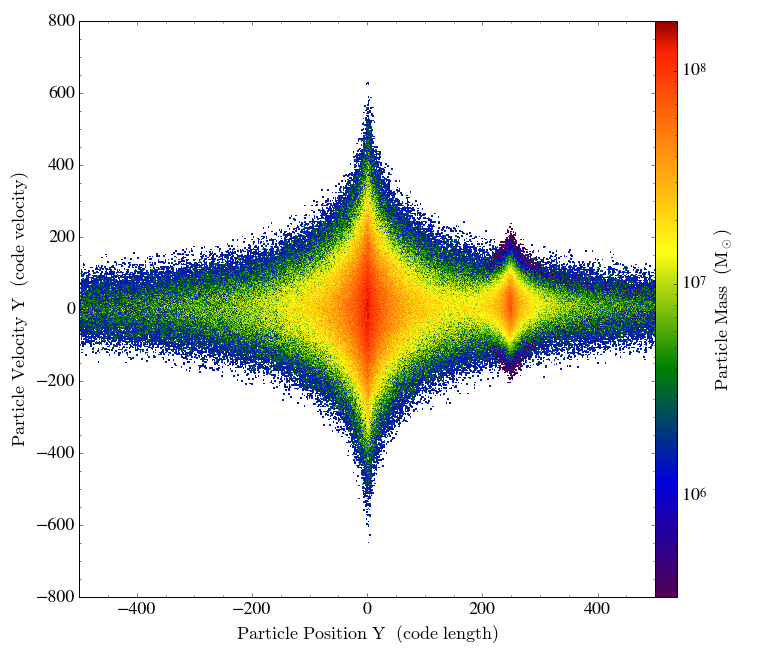

In [48]:
p = yt.ParticlePlot(ds1, ('PartType1','particle_position_y'), ('PartType1','particle_velocity_y'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
p.set_xlim(-500, 500)
p.set_ylim(-800, 800)
p.show()


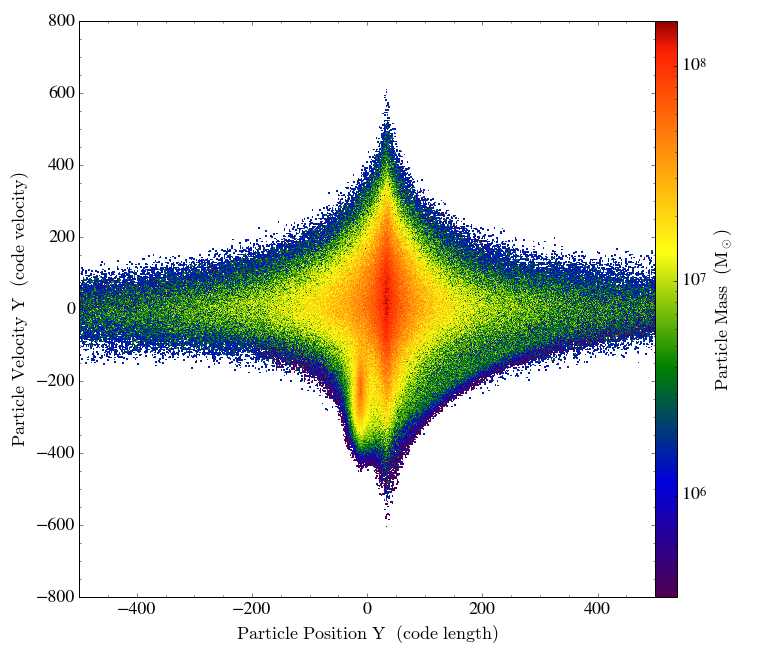

In [49]:
p = yt.ParticlePlot(ds2, ('PartType1','particle_position_y'), ('PartType1','particle_velocity_y'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
#p.set_xlim(-20, 20)
#p.set_ylim(-20, 20)
p.set_xlim(-500, 500)
p.set_ylim(-800, 800)
p.show()


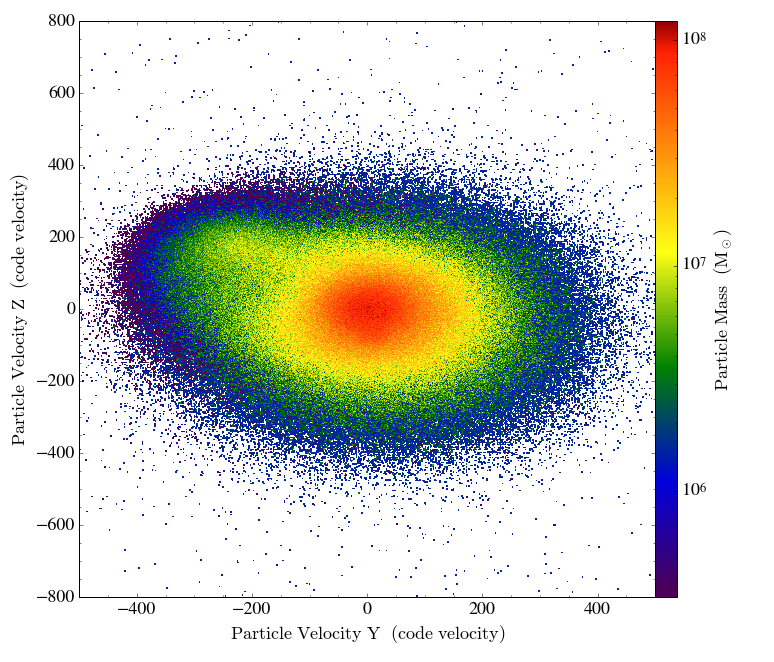

In [54]:
p = yt.ParticlePlot(ds2, ('PartType1','particle_velocity_y'), ('PartType1','particle_velocity_z'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
#p.set_xlim(-20, 20)
#p.set_ylim(-20, 20)
p.set_xlim(-500, 500)
p.set_ylim(-800, 800)
p.show()